# 5주차 DNN 분류 모델 실습 과제


#[문제1] 분류 모델 손실함수 Cross Entropy Loss 이해하기

- Cross Entropy Loss
    - P(X): 실제 데이터 레이블의 확률 분포
    - Q(X): 모델이 예측한 값의 확률 분포
    - Cross Entropy Loss를 최소화하는 것이 분류 모델의 목표
    
<img src="https://velog.velcdn.com/images%2Fcha-suyeon%2Fpost%2Fa6aa9198-df68-418e-88e7-efb488025a50%2Fimage.png">



- Softmax와 CrossEntropy의 관계
    - 이산적인 값을 가지는 분류(classification) 문제에서는 모델의 출력 결과가 로지스틱 함수(logistic function)로 표현됨
    - 분류 클래스가 2개인 로지스틱 함수를 클래스가 n개일 때로 확장한 것이 딥러닝에서 주로 사용하는 softmax function
    - 모델 출력값인 softmax function과 실제 데이터 레이블의 확률 분포의 차이가 분류 문제의 손실 함수가 됨

- 클래스 개수가 3개인 분류 문제를 가정한다. random.uniform(0, 1)을 이용하여 변수 modelA_pred, modelB_pred에 (3,) 크기의 넘파이 어레이를 생성하세요.

In [ ]:
import numpy as np
import random

# 실제 레이블 값
target = np.array([0., 1., 0.])

# 모델 A, B가 예측한 값(softmax 출력층 통과하기 이전이라 가정)
modelA_pred = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
modelB_pred = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])

print(target, modelA_pred, modelB_pred, sep='\n')

[0. 1. 0.]
[0.64447548 0.94678767 0.32947059]
[0.29210872 0.43356256 0.66798413]


- array를 입력받아 Softmax 처리를 한 array 값을 리턴하는 함수 'softmax'를 완성하세요.

In [ ]:
# 소프트맥스 함수
def softmax(arr):
    exp_arr = np.exp(arr)
    return exp_arr/np.sum(exp_arr)

- 변수 modelA_pred, modelB_pred에 Softmax 함수를 적용한 어레이 값을 저장하세요.

In [ ]:
modelA_pred = softmax(modelA_pred)
modelB_pred = softmax(modelB_pred)

print(modelA_pred, modelB_pred, sep='\n')

[0.32438371 0.43888583 0.23673047]
[0.2771455  0.31925702 0.40359748]


- 변수 modelA_pred, modelB_pred의 각 요소의 합이 1임을 확인하세요.(1의 근삿값이어도 괜찮음)

In [ ]:
sum(modelA_pred), sum(modelB_pred)

(1.0, 1.0)

- target array와 predicted array 간 CrossEntropy 값 계산를 위한 함수 'CrossEntropy'를 완성하세요.

In [ ]:
# 크로스엔트로피 함수
def CrossEntropy(tararr, predarr):
  sum=0
  for i in range(len(tararr)):
    sum-=(tararr[i])*np.log(predarr[i])
  return sum

- 변수 modelA_H, modelB_H에 각 모델의 크로스엔트로피 손실을 계산하고, 어떤 모델이 더 예측을 잘했다고 볼 수 있는지 작성하세요.

In [ ]:
modelA_H = CrossEntropy(target,modelA_pred)
modelB_H = CrossEntropy(target,modelB_pred)

print(modelA_H, modelB_H)

0.8235159791763569 1.1417588000738388


- 왜 이진분류 문제에는 'binary_crossentropy'가, 다중분류 문제에는 'categorical_crossentropy'가 사용되는지 탐구하여 작성하세요.

    - binary_crossentropy는 주로 multi label classification 문제에 활용되며 sigmoid와 함께 활용된다. multi label classification이란 여러 label들 각각에 대해 참, 거짓을 판단하여 분류하는 방법을 의미한다. 따라서 참, 거짓의 이진분류가 사용되기 때문에 이름도 binary_crossentropy이고 이진분류에 많이 활용되는 sigmoid 함수를 activation function으로 사용한다.

    반대로 categorical_crossentropy는 multi class classification 문제에 활용되며 softmax와 함께 활용된다. multi class classification은 주어진 여러가지 선택지 중에서 가장 확률적으로 높은 값을 고르는 문제이다. 따라서 이진분류가 아닌 여러 보기들에 대한 확률을 각각 구해서 최대값을 찾아야하므로 softmax가 활용되는 것이다.



- 다중분류 문제에 사용되는 'categorical_crossentropy'와'sparse_categorical_crossentropy'의 차이를 탐구하여 작성하세요.

    - categorical_crossentropy는 답이 원 핫 벡터인 경우에 활용되고, sparse_categorical_crossentropy는 답이 정수형 벡터일 때 활용된다.

# [문제2] Optimizer 탐구하기

- 기존의 경사하강법(GD)의 문제점을 탐구하여 작성하세요.
    - 기울기가 0인 점을 탈출하지 못하고,batch가 1이라서 학습이 매우 느리다는 문제점이 있다.

- GD로부터 파생된 다양한 옵티마이저 중 두 가지를 선택하여 GD를 어떻게 개선하였는지 탐구하여 작성하세요.

    1. Adaptive Gradient (Adagrad)
    
    이 방법은 각 parameter값의 변화를 전체 변화의 합에 대하여 상대적으로 비교하여서 어떤 parameter가 상대적으로 많이 변하고 적게 변했는지를 이용한다. 변화가 많은 parameter는 이미 최적값에 가까워졌을 것이라는 아이디어로 더 적게 변화시킨다. 이는 GD의 느린 학습속도를 개선시켰지만, 여전히 기울기가 0인 지점에 도달할 경우 멈춘다는 문제점은 해결하지 못했다.

    2. RMSProp

    위의 Adagrad의 문제점인 변화가 0이 될 수 있다는 점을 해결하기 위해서 지수항을 도입하였다. 기존의 parameter별로 변화에 가중치를 다르게 한다는 아이디어는 유지하였다.

    3. Adaptive Moment Estimation (Adam)

    RMSProp의 아이디어에서 관성항(Momentum)을 추가한 방법이다. 변화에 따라 다음 변화량을 정할 때 너무 양의 상관계수도, 음의 상관계수도 아니도록 한다. 실제로 최근에 가장 많이 사용되는 optimizer이다.


<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99EF38455AB85F5B227DAE" width=400px>

#[문제3] Body Performance Class 예측하기



## 1.데이터 수집
- 캐글의 데이터 API를 이용하여 Body performance Data 데이터를 로드하세요.(https://www.kaggle.com/datasets/kukuroo3/body-performance-data)
- 참고: 캐글의 Body Performance Data는 국민체육진흥공단에서 제공하는 raw data를 기반으로 가공된 것임(https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)
- 캐글페이지에 설명되어 있는 각 컬럼이 의미하는 내용을 숙지하세요.


- pandas의 데이터프레임 'data' 변수를 선언하여 csv 파일 형태의 데이터를  저장하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'

In [ ]:
!kaggle datasets download -d kukuroo3/body-performance-data

100% 249k/249k [00:00<00:00, 453kB/s]
100% 249k/249k [00:00<00:00, 453kB/s]


In [ ]:
!unzip body-performance-data.zip
!ls

Archive:  body-performance-data.zip
  inflating: bodyPerformance.csv     
bodyPerformance.csv  body-performance-data.zip	drive  sample_data


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('bodyPerformance.csv')

## 2.데이터 전처리

- 아래의 내용을 모두 포함하여 데이터 전처리를 진행하세요.
    - 데이터 형태 확인
    - 결측값 확인
    - Object 타입 변수 중 범주형 데이터 확인, 연속형 변수 분포 확인
    - Heatmap을 통한 변수간 상관관계 확인
    - Object타입 변수 중 숫자형 데이터로 인코딩(One-Hot Encoding)이 필요한 컬럼에 인코딩을 적용
    - 불필요한 컬럼 제거
    - 변수 x에 학습을 위한 feature를, y에 레이블을 추출하여 저장(A~D의 값으로 구성된 class 컬럼이 예측하고자 하는 목표)
    - train set과 test set 적절한 비율로 나누기
    - 스케일링 처리
    - 추가적으로 필요한 전처리

In [ ]:
# 셀별로 어떤 처리를 했는지 주석을 달아주세요.
data.head() #데이터 형태 체크

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
data.info() #데이터 정보 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
data.isna().sum() #column별 결측지 확인

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
data['gender'].value_counts() #object type 데이터 확인_1

M    8467
F    4926
Name: gender, dtype: int64

In [ ]:
data['class'].value_counts() #object type 데이터 확인_2

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

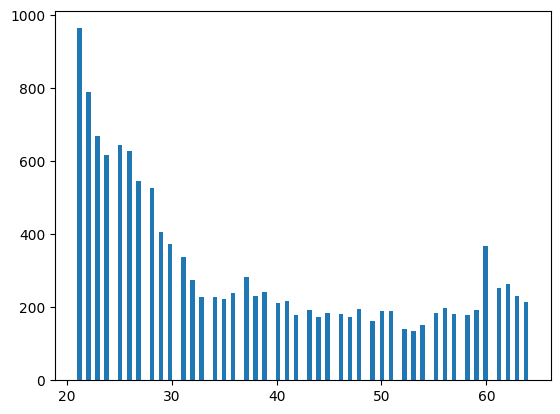

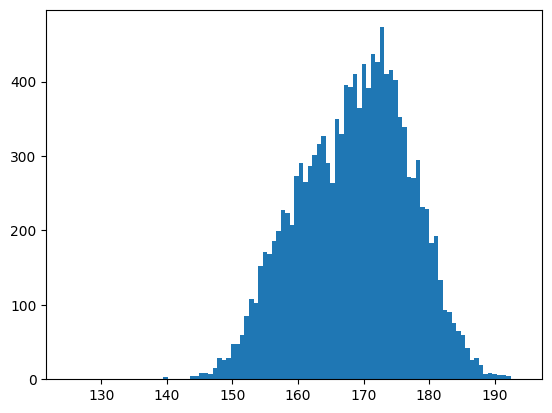

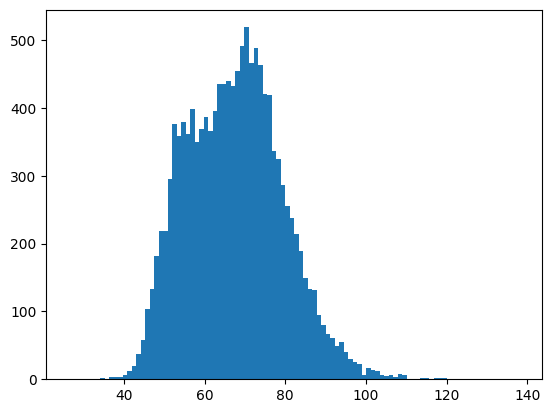

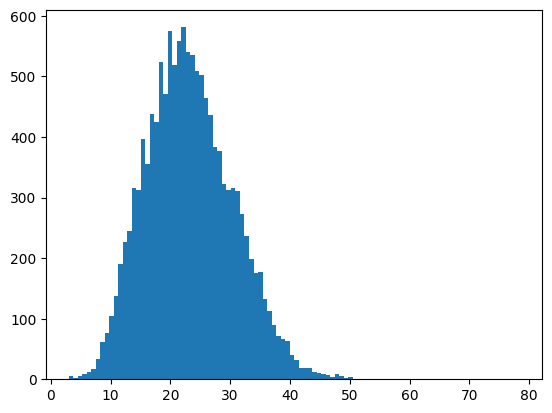

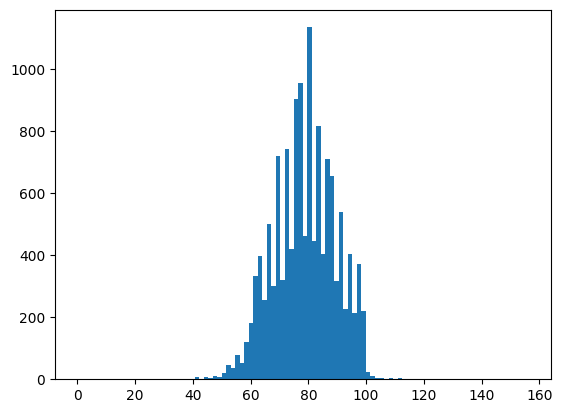

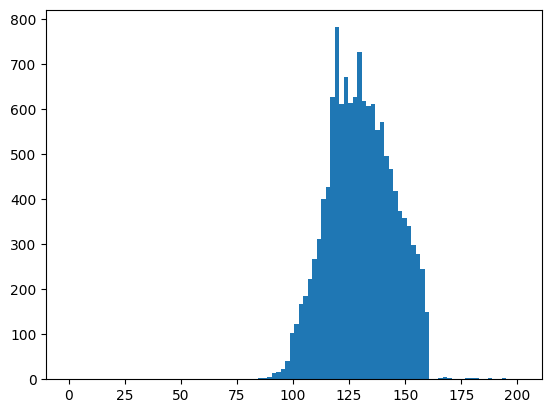

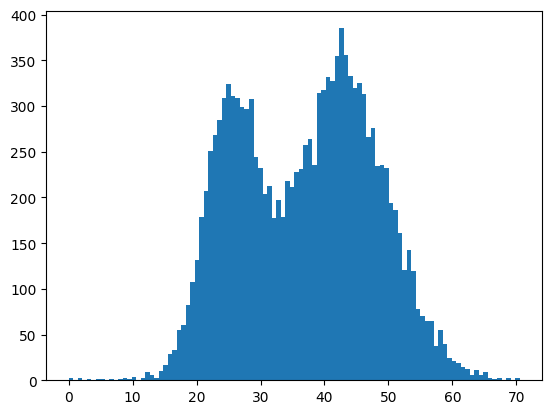

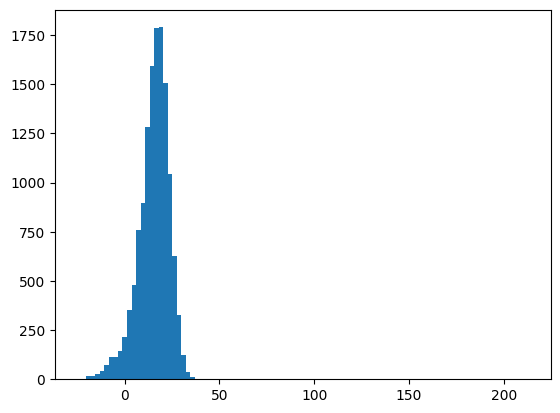

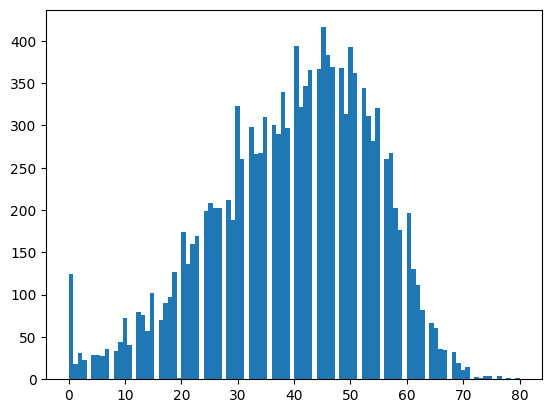

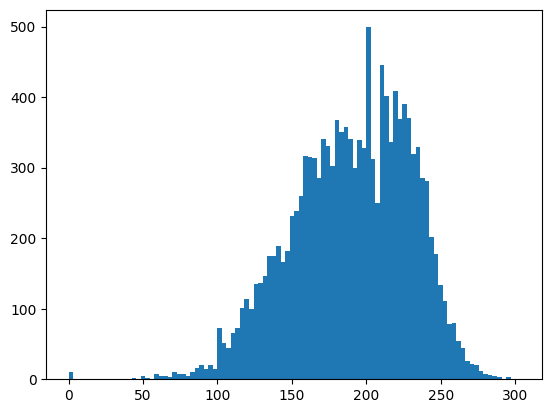

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['age'], bins = 100)
plt.show()
plt.hist(data['height_cm'], bins = 100)
plt.show()
plt.hist(data['weight_kg'], bins = 100)
plt.show()
plt.hist(data['body fat_%'], bins = 100)
plt.show()
plt.hist(data['diastolic'], bins = 100)
plt.show()
plt.hist(data['systolic'], bins = 100)
plt.show()
plt.hist(data['gripForce'], bins = 100)
plt.show()
plt.hist(data['sit and bend forward_cm'], bins = 100)
plt.show()
plt.hist(data['sit-ups counts'], bins = 100)
plt.show()
plt.hist(data['broad jump_cm'], bins = 100)
plt.show() #연속형 변수 분포 확인

In [ ]:
for i in data.columns: # 각 column별 최소값과 최대값 확인 (이상한 값이 있는가?)
  try:
    print(i,data[i].min(),data[i].max())
  except:
    pass

age 21.0 64.0
gender F M
height_cm 125.0 193.8
weight_kg 26.3 138.1
body fat_% 3.0 78.4
diastolic 0.0 156.2
systolic 0.0 201.0
gripForce 0.0 70.5
sit and bend forward_cm -25.0 213.0
sit-ups counts 0.0 80.0
broad jump_cm 0.0 303.0
class A D


In [ ]:
data = data[(data['diastolic']>=40) & (data['systolic']>=75) & (data['gripForce']>=10) & (data['broad jump_cm']>=50)]
#혈압이 0이 측정될 수 없기에 histogram을 참고하여서 적당한 하한선을 잡았다.
#악력 또한 0kg은 불가능하므로 10kg을 기준으로 잡았다.
#멀리뛰기도 20세 이상의 어른들이어서 0cm는 불가능하다고 생각되어 histogram을 보고 기준을 잡았다.

In [ ]:
for i in data.columns: # 각 column별 최소값과 최대값 확인 (이상한 값이 있는가?)
  try:
    print(i,data[i].min(),data[i].max())
  except:
    pass

age 21.0 64.0
gender F M
height_cm 125.0 193.8
weight_kg 26.3 138.1
body fat_% 3.0 78.4
diastolic 40.0 156.2
systolic 82.0 201.0
gripForce 10.0 70.5
sit and bend forward_cm -25.0 213.0
sit-ups counts 0.0 80.0
broad jump_cm 50.0 303.0
class A D


<ipython-input-21-ca84ecf8f02e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot = True) #heatmap을 이용한 상관관계 확인


<Axes: >

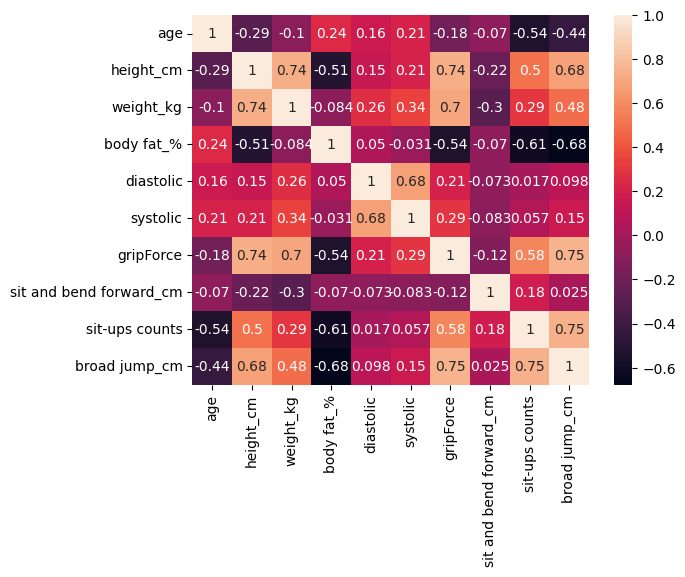

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=data.corr(),annot = True) #heatmap을 이용한 상관관계 확인

In [ ]:
data_ohe = pd.get_dummies(data, columns=['gender']) #gender column 원 핫 인코딩
data_ohe.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder #범주형 데이터 인코딩 (class)
labelencoder = LabelEncoder()
data_encoded = data_ohe
data_encoded['class'] = labelencoder.fit_transform(data_encoded['class'])
data_encoded.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split #data를 train set과 test set으로 나누기
x = data_encoded.drop(['class'],axis=1)
y = data_encoded['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 58, stratify=y)

## 3.모델 학습 및 평가
- 아래의 내용을 포함하여 모델 학습을 진행하세요.
    - 초기 Baseline DNN 모델 생성
    - DNN 모델의 학습 결과를 history 변수 생성하여 저장
    - 모델의 과적합 여부 그래프 등으로 확인하기
    - test 데이터 기반 모델 평가
    - 모델의 문제(과적합, 과소적합 등)를 해결하기 위한 개선된 모델 2가지 이상 시도

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_train.shape

(10685, 12)

In [ ]:
NB_EPOCHS = 100  # num of epochs
BATCH_SIZE = 32

## 모델 정의
model1 = Sequential()

model1.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=NB_EPOCHS,batch_size=BATCH_SIZE,verbose=2)

Epoch 1/100
334/334 - 7s - loss: 1.3638 - accuracy: 0.3929 - val_loss: 1.0270 - val_accuracy: 0.5318 - 7s/epoch - 22ms/step
Epoch 2/100
334/334 - 1s - loss: 0.9520 - accuracy: 0.5613 - val_loss: 0.8878 - val_accuracy: 0.5865 - 1s/epoch - 3ms/step
Epoch 3/100
334/334 - 1s - loss: 0.9110 - accuracy: 0.5876 - val_loss: 0.9296 - val_accuracy: 0.5850 - 1s/epoch - 3ms/step
Epoch 4/100
334/334 - 1s - loss: 0.9255 - accuracy: 0.5809 - val_loss: 0.8926 - val_accuracy: 0.5707 - 992ms/epoch - 3ms/step
Epoch 5/100
334/334 - 1s - loss: 0.8854 - accuracy: 0.5945 - val_loss: 0.8652 - val_accuracy: 0.6089 - 1s/epoch - 3ms/step
Epoch 6/100
334/334 - 1s - loss: 0.8879 - accuracy: 0.5994 - val_loss: 0.8606 - val_accuracy: 0.6059 - 1s/epoch - 4ms/step
Epoch 7/100
334/334 - 1s - loss: 0.8741 - accuracy: 0.6049 - val_loss: 0.9248 - val_accuracy: 0.5640 - 1s/epoch - 4ms/step
Epoch 8/100
334/334 - 1s - loss: 0.8772 - accuracy: 0.6085 - val_loss: 0.8883 - val_accuracy: 0.5831 - 1s/epoch - 4ms/step
Epoch 9/100


In [ ]:
# 학습 결과 그래프 출력
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

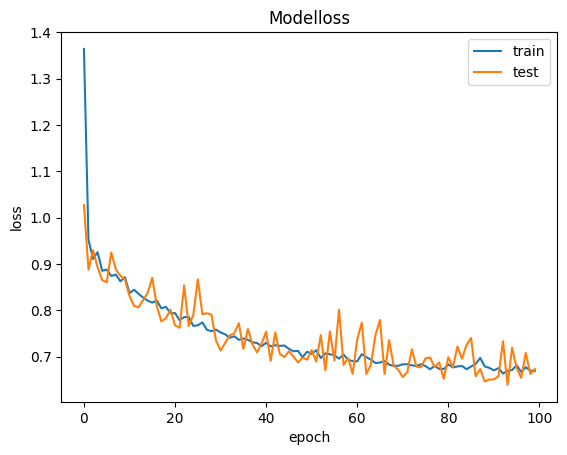

In [ ]:
modelplot(history1, 'loss', 'val_loss')

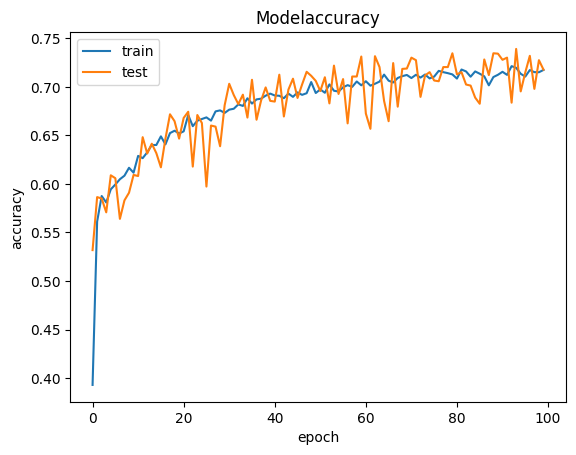

In [ ]:
modelplot(history1, 'accuracy', 'val_accuracy')

In [ ]:


from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # accuracy도 가능
    patience=10,
    restore_best_weights=True
)

In [ ]:
## 모델 정의
model2 = Sequential()
model2.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,
                     validation_data=(x_test, y_test),
                     epochs=NB_EPOCHS, batch_size=BATCH_SIZE,
                     verbose=2,
                     callbacks=[custom_early_stopping])

Epoch 1/100
334/334 - 4s - loss: 1.2080 - accuracy: 0.4525 - val_loss: 0.9650 - val_accuracy: 0.5730 - 4s/epoch - 11ms/step
Epoch 2/100
334/334 - 1s - loss: 0.9537 - accuracy: 0.5588 - val_loss: 0.8888 - val_accuracy: 0.5853 - 1s/epoch - 3ms/step
Epoch 3/100
334/334 - 1s - loss: 0.9046 - accuracy: 0.5863 - val_loss: 0.8756 - val_accuracy: 0.5981 - 995ms/epoch - 3ms/step
Epoch 4/100
334/334 - 1s - loss: 0.8922 - accuracy: 0.5920 - val_loss: 0.8737 - val_accuracy: 0.6224 - 1s/epoch - 3ms/step
Epoch 5/100
334/334 - 1s - loss: 0.8821 - accuracy: 0.6000 - val_loss: 0.8541 - val_accuracy: 0.6052 - 999ms/epoch - 3ms/step
Epoch 6/100
334/334 - 1s - loss: 0.8860 - accuracy: 0.5980 - val_loss: 0.8454 - val_accuracy: 0.6201 - 994ms/epoch - 3ms/step
Epoch 7/100
334/334 - 1s - loss: 0.8722 - accuracy: 0.6008 - val_loss: 0.8407 - val_accuracy: 0.6007 - 997ms/epoch - 3ms/step
Epoch 8/100
334/334 - 1s - loss: 0.8616 - accuracy: 0.6115 - val_loss: 0.8883 - val_accuracy: 0.5984 - 1s/epoch - 4ms/step
Epo

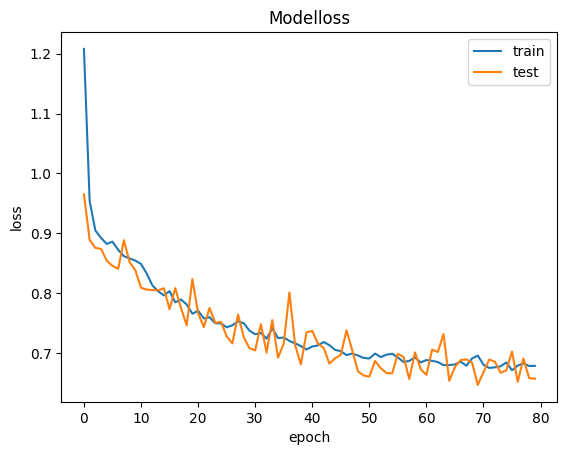

In [ ]:
modelplot(history2, 'loss', 'val_loss')

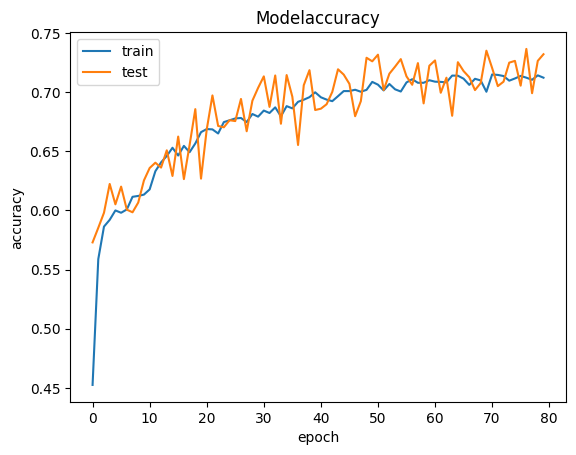

In [ ]:
modelplot(history2, 'accuracy', 'val_accuracy')

In [ ]:
from keras.layers import Dropout
## 모델 정의
model3 = Sequential()
model3.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=NB_EPOCHS, batch_size=BATCH_SIZE,
                     verbose=2,
                     callbacks=[custom_early_stopping])

Epoch 1/100
334/334 - 3s - loss: 2.7115 - accuracy: 0.2481 - val_loss: 1.3865 - val_accuracy: 0.2485 - 3s/epoch - 8ms/step
Epoch 2/100
334/334 - 2s - loss: 1.3863 - accuracy: 0.2432 - val_loss: 1.3846 - val_accuracy: 0.2481 - 2s/epoch - 5ms/step
Epoch 3/100
334/334 - 1s - loss: 1.3846 - accuracy: 0.2606 - val_loss: 1.3844 - val_accuracy: 0.2908 - 1s/epoch - 4ms/step
Epoch 4/100
334/334 - 1s - loss: 1.3820 - accuracy: 0.2662 - val_loss: 1.3701 - val_accuracy: 0.3537 - 1s/epoch - 3ms/step
Epoch 5/100
334/334 - 1s - loss: 1.3665 - accuracy: 0.2856 - val_loss: 1.3282 - val_accuracy: 0.4147 - 1s/epoch - 3ms/step
Epoch 6/100
334/334 - 1s - loss: 1.3332 - accuracy: 0.3238 - val_loss: 1.2447 - val_accuracy: 0.4712 - 1s/epoch - 3ms/step
Epoch 7/100
334/334 - 1s - loss: 1.3257 - accuracy: 0.3229 - val_loss: 1.2222 - val_accuracy: 0.4850 - 1s/epoch - 3ms/step
Epoch 8/100
334/334 - 1s - loss: 1.3043 - accuracy: 0.3447 - val_loss: 1.2177 - val_accuracy: 0.4469 - 1s/epoch - 3ms/step
Epoch 9/100
334/

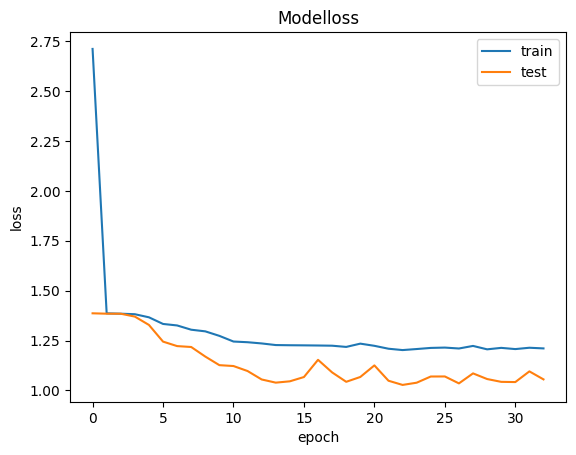

In [ ]:
modelplot(history3, 'loss', 'val_loss')

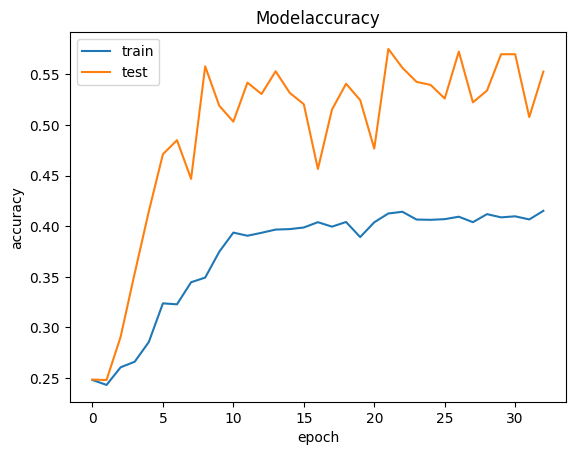

In [ ]:
modelplot(history3, 'accuracy', 'val_accuracy')

In [ ]:
## 모델 정의
model4 = Sequential()
model4.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(8, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(4, activation='softmax'))
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=NB_EPOCHS, batch_size=BATCH_SIZE,
                     verbose=2,
                     callbacks=[custom_early_stopping])

Epoch 1/100
334/334 - 4s - loss: 1.8226 - accuracy: 0.2532 - val_loss: 1.3856 - val_accuracy: 0.2560 - 4s/epoch - 11ms/step
Epoch 2/100
334/334 - 1s - loss: 1.3858 - accuracy: 0.2801 - val_loss: 1.3389 - val_accuracy: 0.3769 - 1s/epoch - 3ms/step
Epoch 3/100
334/334 - 1s - loss: 1.2741 - accuracy: 0.3746 - val_loss: 1.1020 - val_accuracy: 0.5206 - 1s/epoch - 3ms/step
Epoch 4/100
334/334 - 1s - loss: 1.1362 - accuracy: 0.4581 - val_loss: 1.0018 - val_accuracy: 0.5565 - 1s/epoch - 3ms/step
Epoch 5/100
334/334 - 1s - loss: 1.0850 - accuracy: 0.4908 - val_loss: 0.9593 - val_accuracy: 0.5655 - 1s/epoch - 3ms/step
Epoch 6/100
334/334 - 1s - loss: 1.0529 - accuracy: 0.5065 - val_loss: 0.9475 - val_accuracy: 0.5790 - 1s/epoch - 3ms/step
Epoch 7/100
334/334 - 1s - loss: 1.0381 - accuracy: 0.5245 - val_loss: 0.9492 - val_accuracy: 0.5749 - 1s/epoch - 3ms/step
Epoch 8/100
334/334 - 1s - loss: 1.0231 - accuracy: 0.5289 - val_loss: 0.9336 - val_accuracy: 0.5879 - 1s/epoch - 3ms/step
Epoch 9/100
334

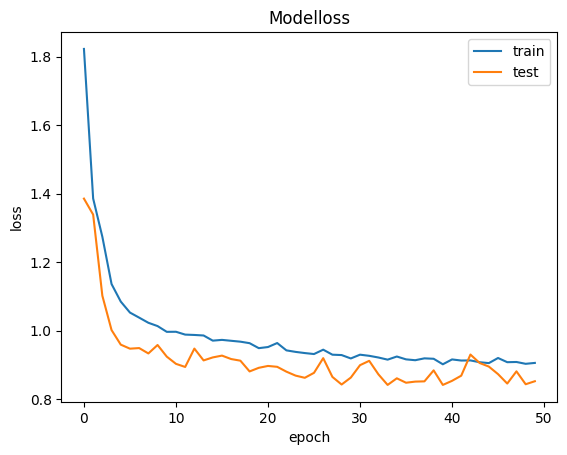

In [ ]:
modelplot(history4, 'loss', 'val_loss')

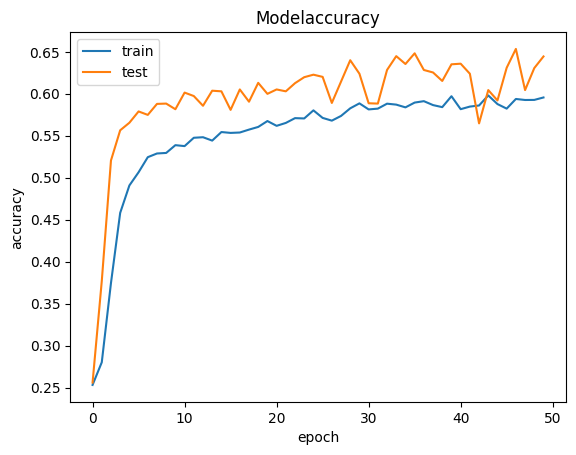

In [ ]:
modelplot(history4, 'accuracy', 'val_accuracy')

In [ ]:
NB_EPOCHS = 200  # num of epochs
BATCH_SIZE = 32

## 모델 정의
model5 = Sequential()

model5.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(4, activation='softmax'))

model5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=NB_EPOCHS,batch_size=BATCH_SIZE,verbose=2)

Epoch 1/200
334/334 - 3s - loss: 1.1334 - accuracy: 0.4871 - val_loss: 1.0293 - val_accuracy: 0.5240 - 3s/epoch - 8ms/step
Epoch 2/200
334/334 - 1s - loss: 0.9583 - accuracy: 0.5609 - val_loss: 0.9200 - val_accuracy: 0.5573 - 1s/epoch - 4ms/step
Epoch 3/200
334/334 - 1s - loss: 0.9360 - accuracy: 0.5739 - val_loss: 0.8937 - val_accuracy: 0.6055 - 1s/epoch - 3ms/step
Epoch 4/200
334/334 - 1s - loss: 0.9077 - accuracy: 0.5891 - val_loss: 0.9104 - val_accuracy: 0.5546 - 1s/epoch - 3ms/step
Epoch 5/200
334/334 - 1s - loss: 0.9092 - accuracy: 0.5901 - val_loss: 0.9189 - val_accuracy: 0.5977 - 1s/epoch - 3ms/step
Epoch 6/200
334/334 - 1s - loss: 0.9096 - accuracy: 0.5853 - val_loss: 0.8972 - val_accuracy: 0.5722 - 1s/epoch - 3ms/step
Epoch 7/200
334/334 - 1s - loss: 0.9012 - accuracy: 0.5953 - val_loss: 0.9076 - val_accuracy: 0.5835 - 1s/epoch - 4ms/step
Epoch 8/200
334/334 - 1s - loss: 0.8920 - accuracy: 0.6007 - val_loss: 0.8817 - val_accuracy: 0.5891 - 1s/epoch - 4ms/step
Epoch 9/200
334/

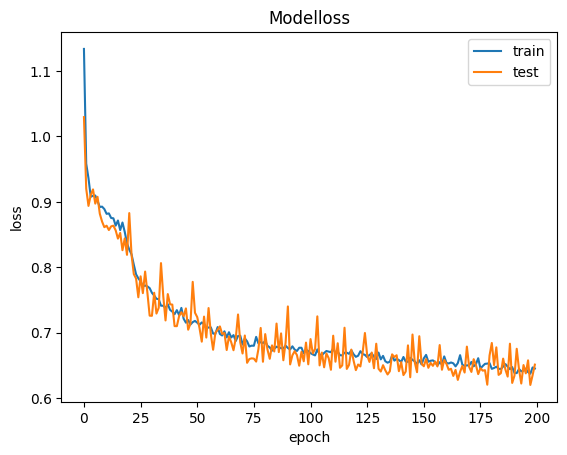

In [ ]:
modelplot(history5, 'loss', 'val_loss')

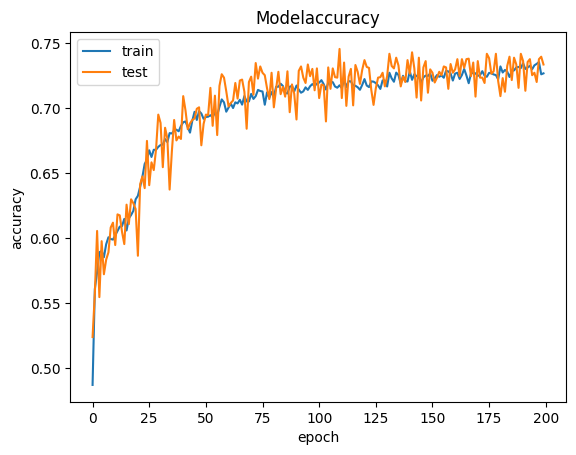

In [ ]:
modelplot(history5, 'accuracy', 'val_accuracy')

- 다음 세 사람의 데이터를 테스트 데이터로 생성하고, 이를 최종 모델에 주입한 결과를 확인하세요.

In [ ]:
# 사람A: 27.0, F, 159.5, 49.6, 29.7, 61.0, 101.2, 22.6, 20.4, 30.0, 182.0
# 사람B: 29.0, M, 176.8, 61.5, 10.5, 72.2, 115.3, 63.0, 19.5, 62.0, 250.0
# 지금 과제를 하는 사람: 잘 모르겠어요 ㅎㅎ

data = [[27.0, 159.5, 49.6, 29.7, 61.0, 101.2, 22.6, 20.4, 30.0, 182.0,1,0],[29.0,176.8, 61.5, 10.5, 72.2, 115.3, 63.0, 19.5, 62.0, 250.0,0,1]]
X = pd.DataFrame(data,columns=x_train.columns)
pred = model5.predict(X)
print(pred[0],pred[1])
print_class = ['A','B','C','D']
print(print_class[pred[0].argmax()],print_class[pred[1].argmax()])

1/1 [==============================] - 0s 80ms/step
[0.05310178 0.7711015  0.16460861 0.01118817] [9.3192476e-01 5.8710434e-02 8.7834233e-03 5.8137433e-04]
B A


## 4.모델 분석
- 초기 baseline 모델의 문제점은? : 과소적합... 이라고 하기엔 애매하지만 반복횟수가 적었던 것 같다.
- 성능이 가장 좋았던 모델의 특성은? : baseline의 DNN 모델이 매우 잘 나온 편이라 early stopping과 drop out을 처리했을 때 오히려 accuracy가 감소하였다.
- 성능이 가장 좋았던 모델의 개선 가능성은? : 과소적합을 해결하기 위해서는 더 많은 데이터의 양과 반복 횟수의 증가가 있다. 따라서 반복횟수를 200회로 증가하였을 때 accuracy가 증가하는 모습을 볼 수는 있었다.

#[스스로 정리하기]
- 문제를 해결하며 배운 점을 스스로 정리하세요.

  히스토그램으로 데이터 분포를 확인하고 적절한 경계를 잡아서 좋은 데이터들을 골라내는 작업이 중요한 것 같았다. 원래 epoch를 늘리면 늘릴수록 과적합이 일어나기 마련이지만, 마지막에 epoch를 200회로 늘렸을 때도 과적합은 보이지 않았다. 이는 데이터를 처음에 선택할 때, 심박수와 멀리뛰기 기록이 0인 데이터가 있어서 히스토그램을 보고 기준을 잡아서 그 이상의 데이터들만 다루었다. 따라서 기본적인 DNN만으로 괜찮은 결과를 가져올 수 있었는데, 이때 과적합이 일어나지 않아서 drop out 방법과 early stopping 방법을 했을 때 더 좋지 않은 결과가 나왔다. 따라서 반복 횟수를 늘리는 것이 방법이라고 결론을 내릴 수 있는 것 같다. 또, 적당한 batch size와 layer의 수를 조절하면 어떤 효과가 생기는지 더 궁금하다.

In [ ]:
#남은 시간동안 계속 돌릴 epoch = 10000
NB_EPOCHS = 10000  # num of epochs
BATCH_SIZE = 32

## 모델 정의
model6 = Sequential()

model6.add(Dense(32, input_dim = x_train.shape[-1],activation='relu',kernel_initializer='random_normal'))
model6.add(Dense(16, activation='relu'))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(4, activation='softmax'))

model6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history6 = model6.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=NB_EPOCHS,batch_size=BATCH_SIZE,verbose=2)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
334/334 - 1s - loss: 0.6043 - accuracy: 0.7488 - val_loss: 0.6253 - val_accuracy: 0.7485 - 1s/epoch - 4ms/step
Epoch 1316/10000
334/334 - 1s - loss: 0.6059 - accuracy: 0.7499 - val_loss: 0.6545 - val_accuracy: 0.7268 - 1s/epoch - 3ms/step
Epoch 1317/10000
334/334 - 1s - loss: 0.6022 - accuracy: 0.7510 - val_loss: 0.6202 - val_accuracy: 0.7466 - 1s/epoch - 4ms/step
Epoch 1318/10000
334/334 - 2s - loss: 0.6099 - accuracy: 0.7465 - val_loss: 0.6559 - val_accuracy: 0.7193 - 2s/epoch - 5ms/step
Epoch 1319/10000
334/334 - 1s - loss: 0.6051 - accuracy: 0.7484 - val_loss: 0.6211 - val_accuracy: 0.7466 - 1s/epoch - 3ms/step
Epoch 1320/10000
334/334 - 1s - loss: 0.6049 - accuracy: 0.7485 - val_loss: 0.6164 - val_accuracy: 0.7507 - 1s/epoch - 3ms/step
Epoch 1321/10000
334/334 - 1s - loss: 0.6064 - accuracy: 0.7479 - val_loss: 0.6438 - val_accuracy: 0.7290 - 1s/epoch - 3ms/step
Epoch 1322/10000
334/334 - 1s - loss: 0.6064 - accuracy: 0.7499 - val_loss: 0.6255 - 

In [ ]:
#GG

In [ ]:
modelplot(history6, 'loss', 'val_loss')

In [ ]:
modelplot(history6, 'accuracy', 'val_accuracy')